In [2]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

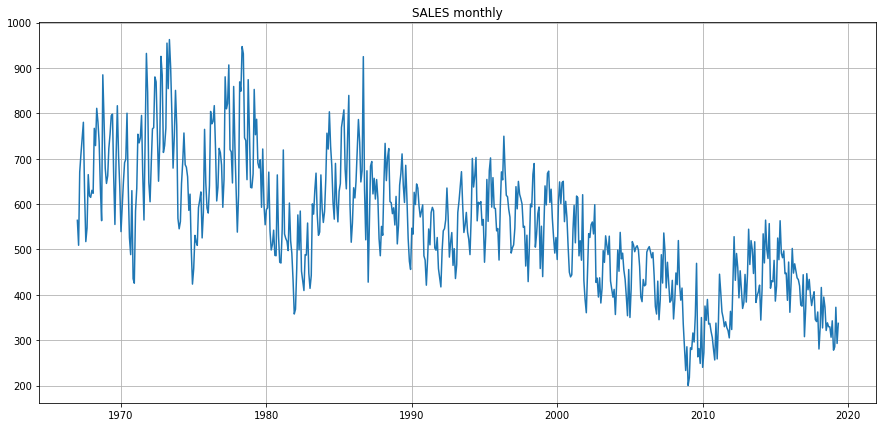

In [3]:
data = pd.read_csv('D:/Udemy/time-series/DAUTONSA.csv', index_col=['DATE'], parse_dates=['DATE'])

plt.figure(figsize=(15, 7))
plt.plot(data['SALES'])
plt.title('SALES monthly')
plt.grid(True)
plt.show()


We can see this a very long time series and it goes back 50 years. From observation we can see that every 10 year
pattern is different and probably affected by the state of the economy and political outcomes in that decade.
It is unwise to fit any model to this ever changing data points with different trends and seasonality. Therefore
we would work with the last 10 year data points to get a more realistic forecasts.

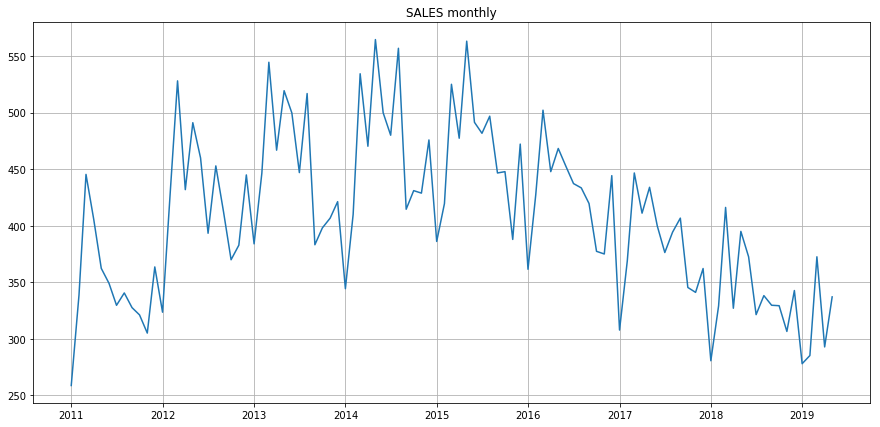

In [4]:
data = data['2011-01-01':]

plt.figure(figsize=(15, 7))
plt.plot(data['SALES'])
plt.title('SALES monthly')
plt.grid(True)
plt.show()

We will now calculate the moving average over multiple data points to get the trend. We will experiment with 3,4 and 12
data point average

In [5]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def plotMovingAverage(series, window, plot_intervals=False, scale=1, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

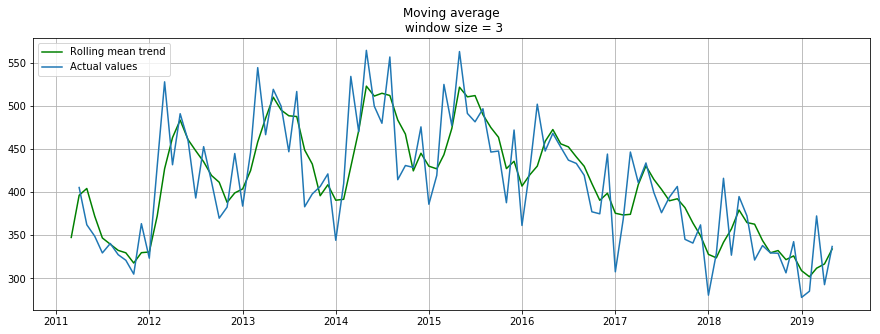

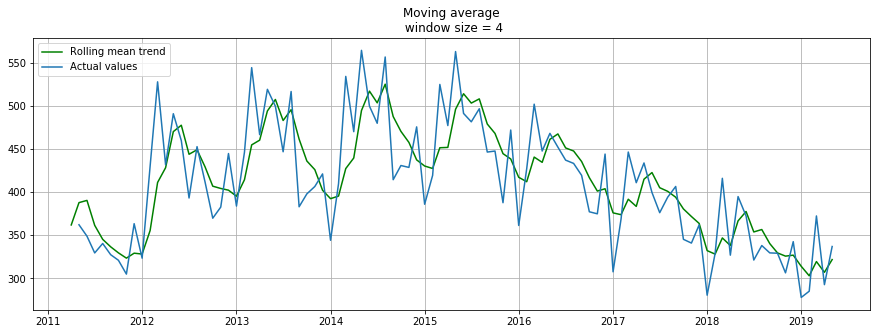

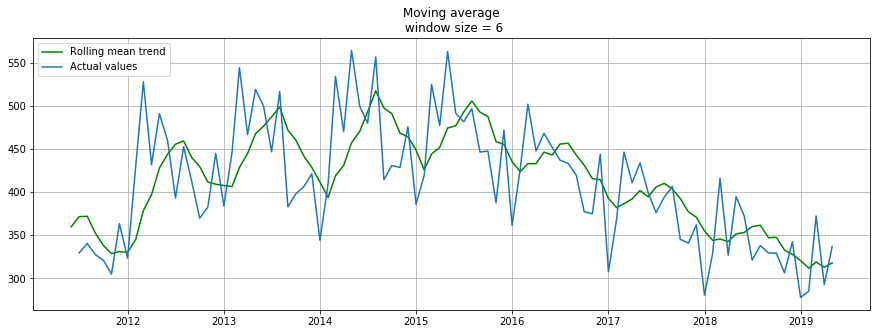

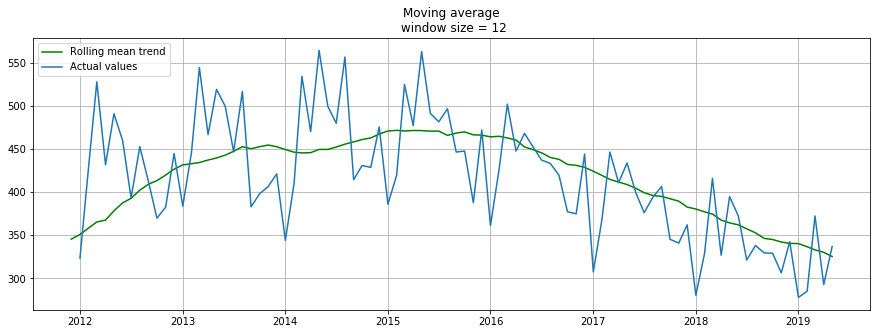

In [6]:
#plotting for 3, 4, 6 and 12 months
plotMovingAverage(data, 3)
plotMovingAverage(data, 4)
plotMovingAverage(data, 6)
plotMovingAverage(data, 12)


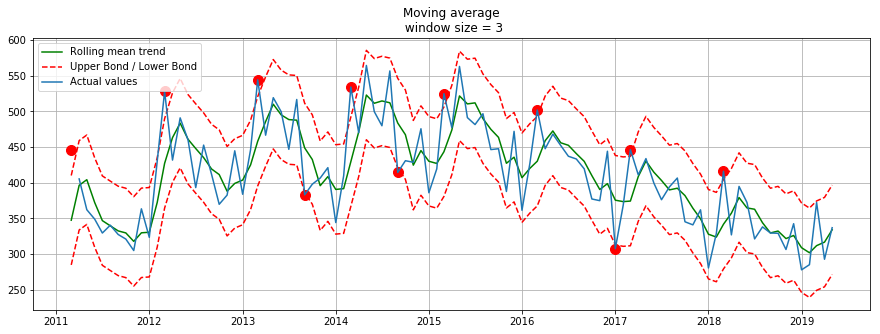

In [7]:
#Lets try plotting the upper and lower bound along with the moving average.
plotMovingAverage(data, 3, plot_intervals=True, plot_anomalies=True)